In [1]:
!pip install qiskit qiskit-aer --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.3 MB/s eta 0:00:00


In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# Initialize simulator
sim = AerSimulator()

# Create a single-qubit circuit with one classical bit
qc = QuantumCircuit(1, 1)

# --- Apply sequence of single-qubit gates ---
qc.x(0)        # Pauli-X (NOT gate)
qc.h(0)        # Hadamard (superposition)
qc.s(0)        # Phase gate (π/2)
qc.t(0)        # T gate (π/4)
qc.rz(0.5, 0)  # Z-axis rotation by 0.5 radians

# Measure final state
qc.measure_all()

# Display circuit
print("Quantum Circuit:")
print(qc.draw())

# --- Run simulation ---
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()

# --- Display results ---
counts = result.get_counts()
print("\nMeasurement Counts:", counts)


Quantum Circuit:
        ┌───┐┌───┐┌───┐┌───┐┌─────────┐ ░ ┌─┐
     q: ┤ X ├┤ H ├┤ S ├┤ T ├┤ Rz(0.5) ├─░─┤M├
        └───┘└───┘└───┘└───┘└─────────┘ ░ └╥┘
   c: 1/═══════════════════════════════════╬═
                                           ║ 
meas: 1/═══════════════════════════════════╩═
                                           0 

Measurement Counts: {'1 0': 494, '0 0': 530}


 Task 1 — Change Gate Order

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

sim = AerSimulator()
qc = QuantumCircuit(1, 1)

# Swapped order: H first, then X
qc.h(0)
qc.x(0)
qc.s(0)
qc.t(0)
qc.rz(0.5, 0)

qc.measure_all()

print("Circuit with Swapped X and H Gates:")
print(qc.draw())

compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()
print("\nMeasurement Counts (Swapped Order):", counts)

Circuit with Swapped X and H Gates:
        ┌───┐┌───┐┌───┐┌───┐┌─────────┐ ░ ┌─┐
     q: ┤ H ├┤ X ├┤ S ├┤ T ├┤ Rz(0.5) ├─░─┤M├
        └───┘└───┘└───┘└───┘└─────────┘ ░ └╥┘
   c: 1/═══════════════════════════════════╬═
                                           ║ 
meas: 1/═══════════════════════════════════╩═
                                           0 

Measurement Counts (Swapped Order): {'0 0': 511, '1 0': 513}


Task 2 — Vary Rotation Angle

(a) θ = π/4

In [4]:
import math
qc = QuantumCircuit(1, 1)
qc.x(0)
qc.h(0)
qc.s(0)
qc.t(0)
qc.rz(math.pi/4, 0)
qc.measure_all()
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()
print("RZ(π/4) Counts:", result.get_counts())

RZ(π/4) Counts: {'0 0': 526, '1 0': 498}


(b) θ = π/2

In [5]:
qc = QuantumCircuit(1, 1)
qc.x(0)
qc.h(0)
qc.s(0)
qc.t(0)
qc.rz(math.pi/2, 0)
qc.measure_all()
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()
print("RZ(π/2) Counts:", result.get_counts())

RZ(π/2) Counts: {'1 0': 525, '0 0': 499}


(c) θ = π

In [6]:
qc = QuantumCircuit(1, 1)
qc.x(0)
qc.h(0)
qc.s(0)
qc.t(0)
qc.rz(math.pi, 0)
qc.measure_all()
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()
print("RZ(π) Counts:", result.get_counts())

RZ(π) Counts: {'1 0': 507, '0 0': 517}


Task 3 — Remove Hadamard Gate

In [7]:
qc = QuantumCircuit(1, 1)
qc.x(0)
# qc.h(0)   ← removed
qc.s(0)
qc.t(0)
qc.rz(0.5, 0)
qc.measure_all()
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()
print("Counts without Hadamard:", result.get_counts())

Counts without Hadamard: {'1 0': 1024}


Visualization — Bloch Sphere

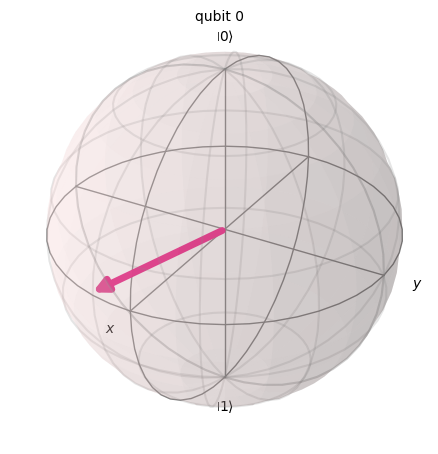

In [9]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

# Create the same circuit, but without measurement
qc_no_measure = QuantumCircuit(1)
qc_no_measure.x(0)
qc_no_measure.h(0)
qc_no_measure.s(0)
qc_no_measure.t(0)
qc_no_measure.rz(0.5, 0)

# Get and plot the statevector
state = Statevector(qc_no_measure)
plot_bloch_multivector(state)